<a href="https://colab.research.google.com/github/SUWAANsilveroak/PCOs-Image-Recognition/blob/main/PCOs_Predictionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python --quiet;
!pip install tensorflow --quiet;

In [ ]:
import os  # Importing the os module for interacting with the operating system
import pandas as pd  # Importing pandas for data manipulation and analysis
import numpy as np  # Importing numpy for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for plotting graphs and visualizations
import seaborn as sns  # Importing seaborn for statistical data visualization
import cv2  # Importing OpenCV for image processing

import tensorflow as tf  # Importing TensorFlow for deep learning functionalities
from tensorflow.keras.models import Sequential  # Importing Sequential model for creating neural networks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # Importing layers for building CNNs
from tensorflow.keras.utils import to_categorical  # Importing to_categorical for converting labels to one-hot encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Importing ImageDataGenerator for image augmentation
from tensorflow.keras.callbacks import EarlyStopping  # Importing EarlyStopping for model training early stopping

In [ ]:
# if your using Google collab
from google.colab import files
uploaded = files.upload()

Saving PCOS_deep_learning.zip to PCOS_deep_learning.zip


In [ ]:
# to handle zipfiles
import zipfile

# Defining the zip file and extraction path
zip_file = "PCOS_deep_learning.zip"
extract_to = "/content/PCOS_deep_learning"

# Extracting the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Verifying the extraction
print(os.listdir(extract_to))

['PCOS_deep_learning']


In [ ]:
# Import necessary libraries
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Defining paths for train and test folders in Google Colab
train_dir = "/content/PCOS_deep_learning/PCOS_deep_learning/train"
test_dir = "/content/PCOS_deep_learning/PCOS_deep_learning/test"

# Defining ImageDataGenerator for data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values between 0 and 1
    shear_range=0.2,    # Random shear transformation
    zoom_range=0.2,     # Random zoom transformation
    horizontal_flip=True # Random horizontal flip
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescale for testing data

# Set up data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Your train folder path
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,  # Number of images in a batch
    class_mode='binary'  # Binary classification (infected or not)
)

test_generator = test_datagen.flow_from_directory(
    test_dir,  # Your test folder path
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,  # Number of images in a batch
    class_mode='binary'  # Binary classification (infected or not)
)

# Print the number of images in each class
print(f"Training set: {train_generator.samples} images")
print(f"Test set: {test_generator.samples} images")


Found 1925 images belonging to 2 classes.
Found 1923 images belonging to 2 classes.
Training set: 1925 images
Test set: 1923 images


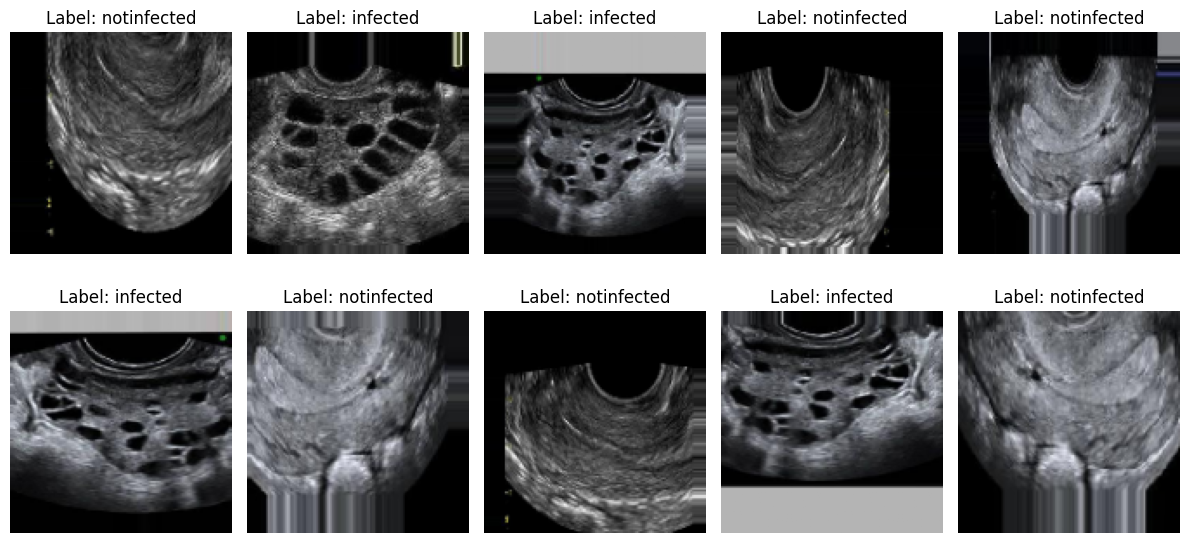

In [ ]:
# import matplotlib.pyplot as plt

# Define a helper function to visualize images with labels
def visualize_samples_from_generator(generator, num_samples=10):
    """
    Visualizes a grid of sample images with their corresponding labels from a data generator.

    Parameters:
    - generator: ImageDataGenerator object that yields image batches
    - num_samples: number of images to display
    """
    plt.figure(figsize=(12, 6))
    image_batch, label_batch = next(generator)

    for i in range(num_samples):
        if i % 32 == 0 and i != 0:  # Move to the next batch after 32 images
            batch += 1
            image_batch, label_batch = next(generator)  # Fetch next batch

        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(image_batch[i % 32])  # Display image from the batch
        label = label_batch[i % 32]
        plt.title(f"Label: {'infected' if label == 0 else 'notinfected'}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize sample images from the training generator
visualize_samples_from_generator(train_generator)


In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model1 = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # 32 filters, 3x3 kernel
    MaxPooling2D(pool_size=(2, 2)),  # Downsampling with 2x2 pooling

    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu'),  # 64 filters, 3x3 kernel
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Layer 3
    Conv2D(128, (3, 3), activation='relu'),  # 128 filters, 3x3 kernel
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the feature maps
    Flatten(),

    # Fully Connected Layer 1
    Dense(128, activation='relu'),  # 128 neurons
    Dropout(0.5),  # Dropout to prevent overfitting

    # Fully Connected Layer 2 (Output Layer)
    Dense(1, activation='sigmoid')  # Binary classification (infected or not)
])

# Compile the model
model1.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Summary of the model
model1.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history1 = model1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # Number of epochs
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)
# took me 10 min in my machine

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.7627 - loss: 0.4382 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 3/10


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


60/60 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9985 - loss: 0.0092 - val_accuracy: 0.9979 - val_loss: 0.0055
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 3.1290e-06
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.9983 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 1.6396e-04
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 1.0000 - loss: 1.0131e-04 - val_accuracy: 1.0000 - val_loss: 5.3146e-06
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 1.0000 - loss: 8.8864e-04 - val_accuracy: 1.0000 - val_loss: 6.2427e-05
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 296ms/step - accuracy: 1.0000 - loss: 1.3730e-04 - val_accuracy: 1.0000 - val_loss: 5.5748e-04
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 1.0000 - loss: 2.5573e-04 - val_accuracy: 1.0000 - val_loss: 8.3890e-06
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - accuracy: 1.0000 - loss: 

# Lets Validate

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(model, img_path, target_size=(128,128)):

    """
    Predicts the class of an image (Infected or Not Infected) using a trained model.

    Parameters:
    - model (tensorflow.keras.Model): The trained deep learning model for prediction.
    - img_path (str): The file path of the image to be predicted.
    - target_size (tuple, optional): The target size to which the image should be resized. Default is (128, 128).

    Returns:
    - str: The predicted class of the image ('Infected' or 'Not Infected').

    Steps:
    1. Loads the image from the given file path.
    2. Resizes the image to match the input size expected by the model.
    3. Normalizes the image to the range [0, 1].
    4. Makes a prediction using the trained model.
    5. Displays the image along with the prediction.
    """

    # Step 1: Load and preprocess the image
    img = Image.open(img_path)  # Open the image
    img = img.resize(target_size)  # Resize the image to the model's expected input size
    img_array = np.array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0, 1]

    # Step 2: Make prediction using the trained model
    prediction = model.predict(img_array)
    predicted_class = 'Not Infected' if prediction[0][0] > 0.5 else 'Infected'

    # Step 3: Display the image and the prediction
    plt.imshow(img)
    plt.title(f'Prediction: {predicted_class}')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

    return predicted_class



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


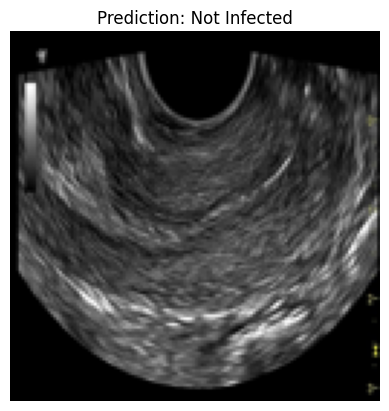

'Not Infected'

In [ ]:
# Lets test our prediction

image_path = '/content/PCOS_deep_learning/PCOS_deep_learning/test/notinfected/img1.jpeg'  # Replace with your image path
predict_image(model1, image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


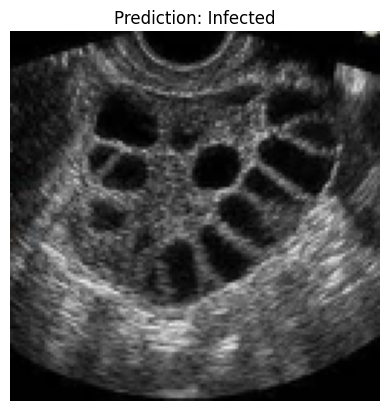

'Infected'

In [ ]:
image_path = '/content/PCOS_deep_learning/PCOS_deep_learning/test/infected/img10.jpg'  # Replace with your image path
predict_image(model1, image_path)

In [ ]:
# Lets save the model
# model1.save('model1.h5')
model1.save('my_model.keras')

# Debug

In [ ]:
from PIL import Image  # Importing Image class from PIL for image handling
import os  # Importing os module for interacting with the file system

def check_images(directory):
    """
    Checks all the images in a directory and its subdirectories to verify if they are corrupt.

    Parameters:
    - directory (str): The path of the directory to check for corrupt images.

    This function walks through the given directory, opens each image, and verifies its integrity. 
    If any image is found to be corrupt, an error message is printed with the image's filename.
    """
    for root, dirs, files in os.walk(directory):  # Walk through the directory and subdirectories
        for file in files:  # Loop through each file in the directory
            try:
                img = Image.open(os.path.join(root, file))  # Open the image
                img.verify()  # Verify if the image is corrupt
            except Exception as e:  # Catch any errors in case the image is corrupt
                print(f"Corrupt image {file}: {e}")  # Print the error message with the corrupt image's name

# Check your train and test directories for corrupt images
check_images(train_dir)  # Check images in the train directory
check_images(test_dir)  # Check images in the test directory


Corrupt image WhatsApp Image 2022-04-01 at 3.49.22 PM.jpeg: cannot identify image file '/content/PCOS_deep_learning/PCOS_deep_learning/test/infected/WhatsApp Image 2022-04-01 at 3.49.22 PM.jpeg'
Corrupt image WhatsApp Image 2022-04-01 at 3.50.05 PM.jpeg: cannot identify image file '/content/PCOS_deep_learning/PCOS_deep_learning/test/infected/WhatsApp Image 2022-04-01 at 3.50.05 PM.jpeg'
Corrupt image WhatsApp Image 2022-04-01 at 3.49.45 PM.jpeg: cannot identify image file '/content/PCOS_deep_learning/PCOS_deep_learning/test/infected/WhatsApp Image 2022-04-01 at 3.49.45 PM.jpeg'
Corrupt image R.jpg: cannot identify image file '/content/PCOS_deep_learning/PCOS_deep_learning/test/infected/R.jpg'
Corrupt image OIP.jpg: cannot identify image file '/content/PCOS_deep_learning/PCOS_deep_learning/test/infected/OIP.jpg'
Corrupt image WhatsApp Image 2022-04-01 at 3.50.20 PM.jpeg: cannot identify image file '/content/PCOS_deep_learning/PCOS_deep_learning/test/infected/WhatsApp Image 2022-04-01 at

In [ ]:
def fix_images(directory):
    """
    Attempts to fix images in a directory by converting them to the PNG format if they are in a different format.

    Parameters:
    - directory (str): The path of the directory where images need to be fixed.

    This function walks through the given directory and its subdirectories, opens each image, 
    and saves it as a PNG file if the image is in another format (such as .jpeg).
    If the image cannot be fixed, an error message is printed with the image's filename.
    """
    for root, dirs, files in os.walk(directory):  # Walk through the directory and subdirectories
        for file in files:  # Loop through each file in the directory
            try:
                img_path = os.path.join(root, file)  # Get the full path of the image
                img = Image.open(img_path)  # Open the image
                img.save(img_path.replace('.jpeg', '.png'))  # Save the image as a PNG file
                print(f"Fixed image {file}")  # Print success message
            except Exception as e:  # Catch any errors in case the image cannot be fixed
                print(f"Cannot fix image {file}: {e}")  # Print error message with the image's name

# Try fixing images in both train and test directories
fix_images(train_dir)  # Attempt to fix images in the train directory
fix_images(test_dir)  # Attempt to fix images in the test directory


Fixed image img_0_2743.jpg
Fixed image img_0_1725.jpg
Fixed image img_0_6547.jpg
Fixed image img_0_5103.jpg
Fixed image img_0_2908.jpg
Fixed image img_0_8100.jpg
Fixed image img_0_1287.jpg
Fixed image img_0_1142.jpg
Fixed image img_0_6669.jpg
Fixed image img_0_8270.jpg
Fixed image img_0_6447.jpg
Fixed image img_0_2557.jpg
Fixed image img_0_5668.jpg
Fixed image img_0_6121.jpg
Fixed image img_0_766.jpg
Fixed image img_0_1786.jpg
Fixed image img_0_6155.jpg
Fixed image img_0_5671.jpg
Fixed image img_0_8994.jpg
Fixed image img_0_3559.jpg
Fixed image img_0_1305.jpg
Fixed image img_0_1234.jpg
Fixed image img_0_233.jpg
Fixed image img_0_5531.jpg
Fixed image img_0_3475.jpg
Fixed image img_0_2179.jpg
Fixed image img_0_7385.jpg
Fixed image img_0_9089.jpg
Fixed image img_0_7558.jpg
Fixed image img_0_3796.jpg
Fixed image img_0_6220.jpg
Fixed image img_0_3286.jpg
Fixed image img_0_3148.jpg
Fixed image img_0_722.jpg
Fixed image img_0_3626.jpg
Fixed image img_0_1886.jpg
Fixed image img_0_937.jpg
Fixed

In [ ]:
def delete_corrupt_images(directory):
    """
    This function will delete the corrupt images in the specified directory.
    It will check all images in the directory and its subdirectories, and delete
    any images that cannot be opened or verified by PIL.

    Parameters:
    - directory (str): The path of the directory to check for corrupt images.
    """
    for root, dirs, files in os.walk(directory):  # Walk through the directory and subdirectories
        for file in files:  # Loop through each file in the directory
            img_path = os.path.join(root, file)  # Get the full path of the image
            try:
                img = Image.open(img_path)  # Try to open the image
                img.verify()  # Check if the image is valid
            except Exception as e:  # If there is an exception, the image is corrupt
                # If image is corrupted, delete it
                print(f"Deleting corrupt image: {file}")  # Print which image is being deleted
                os.remove(img_path)  # Delete the corrupt image

# Check and delete corrupted images in the test directory
delete_corrupt_images("/content/PCOS_deep_learning/PCOS_deep_learning/test")  # Check and delete corrupt images in the test directory

# Check and delete corrupted images in the train directory
delete_corrupt_images("/content/PCOS_deep_learning/PCOS_deep_learning/train")  # Check and delete corrupt images in the train directory


Deleting corrupt image: WhatsApp Image 2022-04-01 at 3.49.22 PM.jpeg
Deleting corrupt image: WhatsApp Image 2022-04-01 at 3.50.05 PM.jpeg
Deleting corrupt image: WhatsApp Image 2022-04-01 at 3.49.45 PM.jpeg
Deleting corrupt image: R.jpg
Deleting corrupt image: OIP.jpg
Deleting corrupt image: WhatsApp Image 2022-04-01 at 3.50.20 PM.jpeg
Deleting corrupt image: WhatsApp Image 2022-04-01 at 3.39.07 PM.jpeg
Deleting corrupt image: img_0_7.jpg
Deleting corrupt image: OIP (1).jpg
Deleting corrupt image: WhatsApp Image 2022-04-01 at 3.35.25 PM.jpeg


In [ ]:
# Checking any issues in dir
print(f"Train directory: {train_dir}")
print(f"Test directory: {test_dir}")

Train directory: /content/PCOS_deep_learning/PCOS_deep_learning/train
Test directory: /content/PCOS_deep_learning/PCOS_deep_learning/test


In [ ]:
# Checking dimensions
image_batch, label_batch = next(train_generator)
print(image_batch.shape)  # This should print (batch_size, height, width, channels)
print(label_batch)  # Check labels to ensure they match the correct class


(32, 128, 128, 3)
[0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 1. 0. 1. 0. 0. 0.]
